# Lab #4

## Import libs & connect to database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [6]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [7]:
cur=conn.cursor()

## Q1

Display all the records in the student table

In [8]:
sql_q1 = """
            select * from gp22.student
            """

In [9]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,IA


## Q2

Display the teachers' names and the corresponding course names jointly based
on the teacher's email

In [10]:
sql_q2 = """
        select gp22.professor.p_name,
        gp22.course.c_name
        from gp22.professor
        inner join gp22.course
        on gp22.professor.p_email = gp22.course.p_email
        
        """

In [11]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Xuebin Wei,Data Mining
1,Noel Hendrickson,Counter Reason
2,Noel Hendrickson,Casual Analysis
3,Timothy Walton,National Security
4,Alyssa Cartee,Networked World
5,Alyssa Cartee,Research Writing


## Q3

Use a bar chart to show the number of enrolled students by each course
number

In [23]:
sql_q3 = """
        select c_num,
        count(c_num) as enroll_list
        from gp22.enroll_list
        group by c_num
        order by enroll_list desc
        """

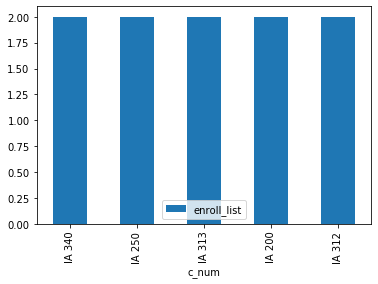

In [24]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enroll_list',x='c_num')

## Q4

Use a bar chart to show the number of courses taught by each professor's name

In [25]:
sql_q4 = """
        select gp22.professor.p_name,
        count(gp22.course.c_name) as teaching_number
        from gp22.professor
        inner join gp22.course
        on gp22.professor.p_email = gp22.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

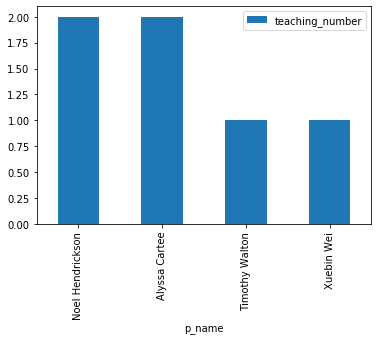

In [26]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## Q5

A new professor just joined JMU and will teach a new course. Add a new record
of the new professor in the teacher table, and the corresponding new course
record in the course table. You can make up the professor's info and the new
course info. Display the modified professor table and the course table

In [61]:
sql_q5_professor = """
                    insert into gp22.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p@jmu.edu','new_p','new_office')

In [64]:
cur.execute(sql_q5_professor)

In [65]:
cur.execute('ROLLBACK')

In [66]:
conn.commit()

In [67]:
df=pandas.read_sql_query('select * from gp22.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,Xuebin Wei,ISAT 112
1,waltontr@jmu.edu,Timothy Walton,ISAT 326
2,marrinsp@jmu.edu,Stephen Marrin,EnGeo 2104
3,hendrinx@jmu.edu,Noel Hendrickson,n/a
4,cartee@jmu.edu,Alyssa Cartee,ISAT 180
5,new_p@jmu.edu,new_p,new_office


In [68]:
sql_q5_course = """
                    insert into gp22.course(c_num,c_name,room_num,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new','new_c_name','online','new_p@jmu.edu')

In [70]:
cur.execute(sql_q5_course)

In [71]:
cur.execute('ROLLBACK')

In [72]:
conn.commit()

In [73]:
df=pandas.read_sql_query('select * from gp22.course',conn)
df[:]

,c_num,c_name,room_num,p_email
0,IA 340,Data Mining,Online,weixx@jmu.edu
1,IA 313,Counter Reason,Online,hendrinx@jmu.edu
2,IA 312,Casual Analysis,Online,hendrinx@jmu.edu
3,IA 200,National Security,Online,waltontr@jmu.edu
4,Ia 240,Networked World,Online,cartee@jmu.edu
5,IA 250,Research Writing,Online,cartee@jmu.edu
6,ia_new,new_c_name,online,new_p@jmu.edu


## Q6

An existing professor will retire soon, and the newly hired professor will teach
his/her courses. Delete one of the existing professors in the teacher table and
change the instructor of his/her classes in the course table to the newly hired
professor. Display the modified professor table and the course table

In [74]:
sql_q6_course = """
                update gp22.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [76]:
cur.execute(sql_q6_course)

In [75]:
cur.execute('ROLLBACK')

In [77]:
conn.commit()

In [79]:
df=pandas.read_sql_query('select * from gp22.course',conn)
df[:]

,c_num,c_name,room_num,p_email
0,IA 313,Counter Reason,Online,hendrinx@jmu.edu
1,IA 312,Casual Analysis,Online,hendrinx@jmu.edu
2,IA 200,National Security,Online,waltontr@jmu.edu
3,Ia 240,Networked World,Online,cartee@jmu.edu
4,IA 250,Research Writing,Online,cartee@jmu.edu
5,ia_new,new_c_name,online,new_p@jmu.edu
6,IA 340,Data Mining,Online,new_p@jmu.edu


In [80]:
sql_q6_professor = """
                delete from gp22.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [81]:
cur.execute(sql_q6_professor)

In [82]:
conn.commit()

In [83]:
df=pandas.read_sql_query('select * from gp22.professor',conn)
df[:]

,p_email,p_name,office
0,waltontr@jmu.edu,Timothy Walton,ISAT 326
1,marrinsp@jmu.edu,Stephen Marrin,EnGeo 2104
2,hendrinx@jmu.edu,Noel Hendrickson,n/a
3,cartee@jmu.edu,Alyssa Cartee,ISAT 180
4,new_p@jmu.edu,new_p,new_office


## Close connection

In [84]:
cur.close()
conn.close()